In [1]:
import os
import sys

In [2]:
sys.path.append('../lib')

In [3]:
import cov_independence_test
import gen_processes;


In [4]:
from importlib import reload
reload(cov_independence_test);
reload(gen_processes);

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.ar_model as ar
import torch
torch.set_default_dtype(torch.double)
import sigkernel

In [6]:
import scipy.stats as stats

In [7]:
from tqdm import tqdm

In [8]:
from itertools import product

In [9]:
import matplotlib.pyplot as plt

In [10]:
import esig

In [11]:
esig.set_backend("iisignature")


In [12]:
RNG = np.random.default_rng(1234)

In [214]:
very_long_processes = gen_processes.gen_ar_iid_samples_burn_in(1001, 20, 0).numpy()
long_processes = gen_processes.gen_ar_iid_samples_burn_in(501, 20, 0).numpy()
medium_processes = gen_processes.gen_ar_iid_samples_burn_in(101, 20, 0).numpy()
short_processes = gen_processes.gen_ar_iid_samples_burn_in(51, 20, 0).numpy()
shorter_processes = gen_processes.gen_ar_iid_samples_burn_in(31, 20, 0).numpy()
nice_processes = gen_processes.gen_ar_iid_samples_burn_in(6, 20, 0.8).numpy()

In [215]:
very_long_processes_ll = np.dstack((very_long_processes[:, 1:, 0], very_long_processes[:, :1000, 0]))
long_processes_ll = np.dstack((long_processes[:, 1:, 0], long_processes[:, :500, 0]))
medium_processes_ll = np.dstack((medium_processes[:, 1:, 0], medium_processes[:, :100, 0]))
short_processes_ll = np.dstack((short_processes[:, 1:, 0], short_processes[:, :50, 0]))
shorter_processes_ll = np.dstack((shorter_processes[:, 1:, 0], shorter_processes[:, :30, 0]))

nice_processes_ll = np.dstack((nice_processes[:, 1:, 0], nice_processes[:, :5, 0]))

In [15]:
sig_vl = esig.stream2sig(very_long_processes_ll[0, :, :].reshape(1000, 2)/8, 10)
sig_l = esig.stream2sig(long_processes_ll[0, :, :].reshape(500, 2)/8, 10)
sig_m = esig.stream2sig(medium_processes_ll[0, :, :].reshape(100, 2)/8, 10)
sig_s = esig.stream2sig(short_processes_ll[0, :, :].reshape(50, 2)/8, 10)
sig_n = esig.stream2sig(nice_processes_ll[0, :, :].reshape(15, 2)/8, 10)


In [357]:
this_slice  = RNG.integers(0, 19)


In [358]:
NLEN = 15
nice_processes = gen_processes.gen_ar_iid_samples_burn_in(NLEN + 1, 20, .80).numpy()
nice_processes_x_ll = np.dstack((nice_processes[:, 1:, 0], nice_processes[:, :NLEN, 0]))
nice_processes_y_ll = np.dstack((nice_processes[:, 1:, 1], nice_processes[:, :NLEN, 1]))

In [373]:
def get_lead_lag_proc_length(proc):
    return np.sqrt(np.diff(proc[0])**2 + np.diff(proc[1])**2).sum()

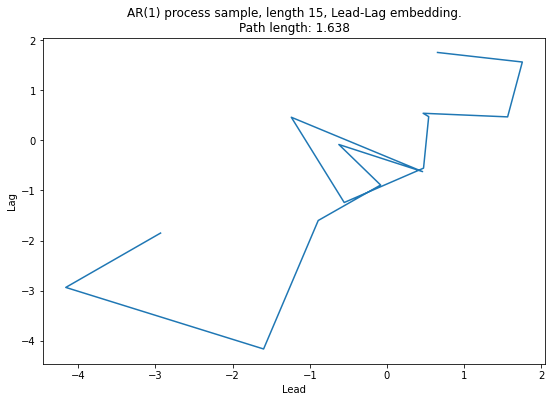

In [396]:
plt.figure(figsize=(9,6))
plt.plot(nice_processes_x_ll[this_slice, :, 0].reshape(NLEN), nice_processes_x_ll[this_slice, :,1].reshape(NLEN))
plt.xlabel('Lead')
plt.ylabel('Lag')
plt.title("AR(1) process sample, length 15, Lead-Lag embedding.\nPath length: {:.3f}".format(get_lead_lag_proc_length(nice_processes_x_ll[this_slice, :].reshape(NLEN, -1))))
plt.savefig('./pics/sig_mistery_ar1_ll_embedding.png')

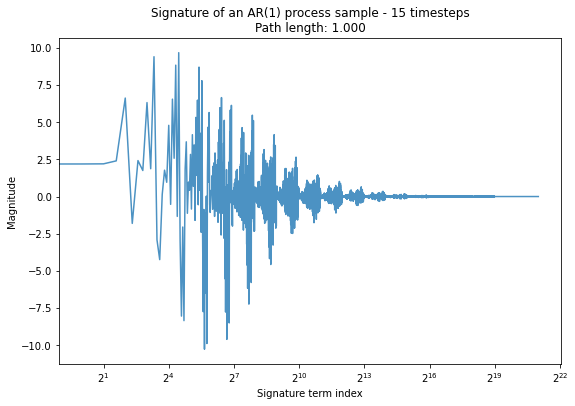

In [403]:

#plt.plot(nice_processes_x_ll[this_slice, :, 0].reshape(NLEN), nice_processes_x_ll[this_slice, :,1].reshape(NLEN))
#plt.plot(nice_processes_y_ll[this_slice, :, 0].reshape(NLEN), nice_processes_y_ll[this_slice, :,1].reshape(NLEN))
#plt.figure()
#plt.plot(nice_processes_x_ll[this_slice, :, 0].reshape(NLEN))
#plt.plot(nice_processes_y_ll[this_slice, :, 0].reshape(NLEN))

plt.figure(figsize=(9,6))
sig_n_x = esig.stream2sig(nice_processes_x_ll[this_slice, :, :].reshape(NLEN, 2)/get_lead_lag_proc_length(nice_processes_x_ll[this_slice, :].reshape(NLEN, -1)), 20)#/np.log(tv), 20)
#sig_n_y = esig.stream2sig(nice_processes_y_ll[this_slice, :, :].reshape(NLEN, 2), 20)#/np.log(tv), 20)
plt.plot(sig_n_x, alpha = 0.8)
#plt.plot(sig_n_y, alpha = 0.8)
plt.xscale('log', base = 2)
plt.ylabel('Magnitude')
plt.xlabel('Signature term index')
plt.title("Signature of an AR(1) process sample - 15 timesteps\nPath length: {:.3f}".format(get_lead_lag_proc_length(nice_processes_x_ll[this_slice, :].reshape(NLEN, -1)/get_lead_lag_proc_length(nice_processes_x_ll[this_slice, :].reshape(NLEN, -1)))))
plt.savefig('./pics/sig_mistery_ar1_signature_unscaled.png')
#for i in range (20):
    #plt.axvline(2**i, color = 'red')

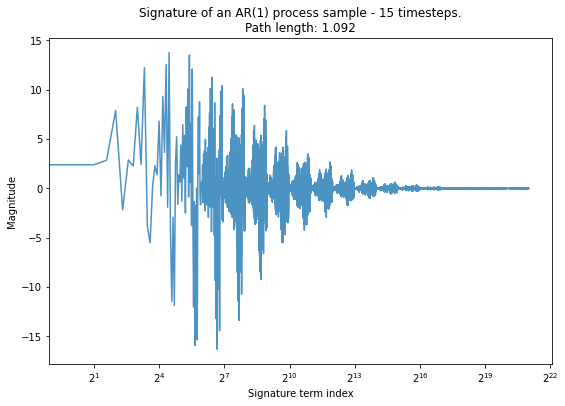

In [397]:

#plt.plot(nice_processes_x_ll[this_slice, :, 0].reshape(NLEN), nice_processes_x_ll[this_slice, :,1].reshape(NLEN))
#plt.plot(nice_processes_y_ll[this_slice, :, 0].reshape(NLEN), nice_processes_y_ll[this_slice, :,1].reshape(NLEN))
#plt.figure()
#plt.plot(nice_processes_x_ll[this_slice, :, 0].reshape(NLEN))
#plt.plot(nice_processes_y_ll[this_slice, :, 0].reshape(NLEN))

plt.figure(figsize=(9,6))
sig_n_x = esig.stream2sig(nice_processes_x_ll[this_slice, :, :].reshape(NLEN, 2)/1.5, 20)#/np.log(tv), 20)
#sig_n_y = esig.stream2sig(nice_processes_y_ll[this_slice, :, :].reshape(NLEN, 2), 20)#/np.log(tv), 20)
plt.plot(sig_n_x, alpha = 0.8)
#plt.plot(sig_n_y, alpha = 0.8)
plt.xscale('log', base = 2)
plt.ylabel('Magnitude')
plt.xlabel('Signature term index')
plt.title("Signature of an AR(1) process sample - 15 timesteps.\nPath length: {:.3f}".format(get_lead_lag_proc_length(nice_processes_x_ll[this_slice, :].reshape(NLEN, -1)/1.5)))
plt.savefig('./pics/sig_mistery_ar1_signature_scaled_div_1p5.png')

#for i in range (20):
    #plt.axvline(2**i, color = 'red')

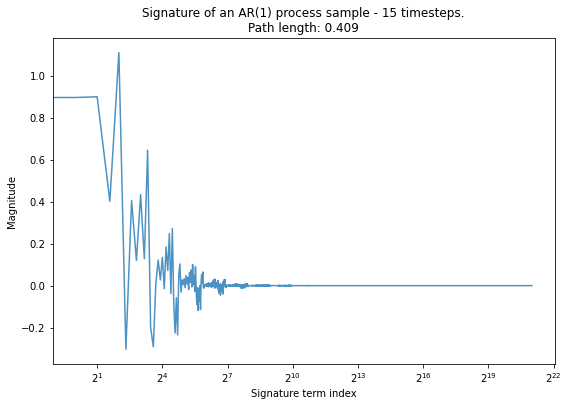

In [398]:

#plt.plot(nice_processes_x_ll[this_slice, :, 0].reshape(NLEN), nice_processes_x_ll[this_slice, :,1].reshape(NLEN))
#plt.plot(nice_processes_y_ll[this_slice, :, 0].reshape(NLEN), nice_processes_y_ll[this_slice, :,1].reshape(NLEN))
#plt.figure()
#plt.plot(nice_processes_x_ll[this_slice, :, 0].reshape(NLEN))
#plt.plot(nice_processes_y_ll[this_slice, :, 0].reshape(NLEN))

plt.figure(figsize=(9,6))
sig_n_x = esig.stream2sig(nice_processes_x_ll[this_slice, :, :].reshape(NLEN, 2)/4, 20)#/np.log(tv), 20)
#sig_n_y = esig.stream2sig(nice_processes_y_ll[this_slice, :, :].reshape(NLEN, 2), 20)#/np.log(tv), 20)
plt.plot(sig_n_x, alpha = 0.8)
#plt.plot(sig_n_y, alpha = 0.8)
plt.xscale('log', base = 2)
plt.ylabel('Magnitude')
plt.xlabel('Signature term index')
plt.title("Signature of an AR(1) process sample - 15 timesteps.\nPath length: {:.3f}".format(get_lead_lag_proc_length(nice_processes_x_ll[this_slice, :].reshape(NLEN, -1)/4)))
plt.savefig('./pics/sig_mistery_ar1_signature_scaled_div_4.png')

#for i in range (20):
    #plt.axvline(2**i, color = 'red')

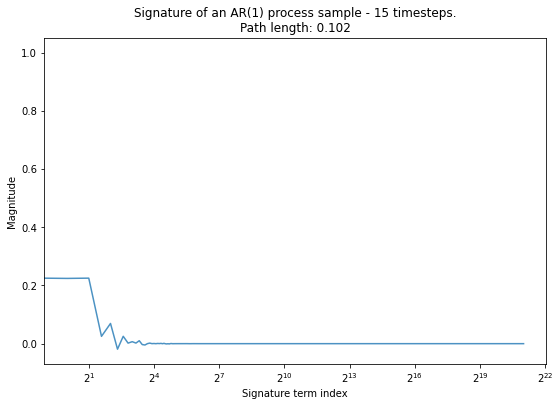

In [399]:

#plt.plot(nice_processes_x_ll[this_slice, :, 0].reshape(NLEN), nice_processes_x_ll[this_slice, :,1].reshape(NLEN))
#plt.plot(nice_processes_y_ll[this_slice, :, 0].reshape(NLEN), nice_processes_y_ll[this_slice, :,1].reshape(NLEN))
#plt.figure()
#plt.plot(nice_processes_x_ll[this_slice, :, 0].reshape(NLEN))
#plt.plot(nice_processes_y_ll[this_slice, :, 0].reshape(NLEN))

plt.figure(figsize=(9,6))
sig_n_x = esig.stream2sig(nice_processes_x_ll[this_slice, :, :].reshape(NLEN, 2)/16, 20)#/np.log(tv), 20)
#sig_n_y = esig.stream2sig(nice_processes_y_ll[this_slice, :, :].reshape(NLEN, 2), 20)#/np.log(tv), 20)
plt.plot(sig_n_x, alpha = 0.8)
#plt.plot(sig_n_y, alpha = 0.8)
plt.xscale('log', base = 2)
plt.ylabel('Magnitude')
plt.xlabel('Signature term index')
plt.title("Signature of an AR(1) process sample - 15 timesteps.\nPath length: {:.3f}".format(get_lead_lag_proc_length(nice_processes_x_ll[this_slice, :].reshape(NLEN, -1)/16)))
plt.savefig('./pics/sig_mistery_ar1_signature_scaled_div_16.png')

#for i in range (20):
    #plt.axvline(2**i, color = 'red')

In [347]:
sig_s = esig.stream2sig(short_processes_ll[0, :, :].reshape(50, 2)/4, 20)

In [50]:
sig_ser = esig.stream2sig(shorter_processes_ll[0, :, :].reshape(30, 2)/4, 20)

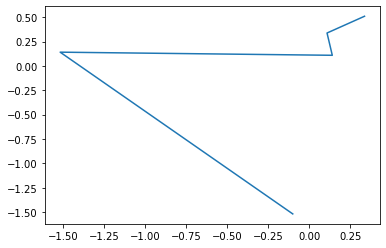

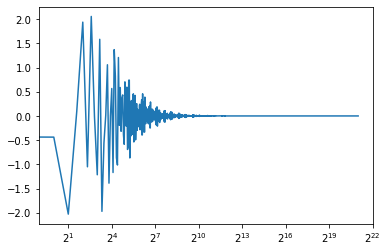

In [231]:
#plt.plot(sig_s)
this_slice  = RNG.integers(0, 19)
#print(nice_processes_ll[this_slice, :, :].max())

plt.plot(nice_processes_ll[this_slice, :, 0].reshape(5), nice_processes_ll[this_slice, :,1].reshape(5))
plt.figure()
sig_n = esig.stream2sig(nice_processes_ll[this_slice, :, :].reshape(5, 2), 20)#/np.log(tv), 20)
plt.plot(sig_n)
plt.xscale('log', base = 2)
#for i in range (20):
    #plt.axvline(2**i, color = 'red')

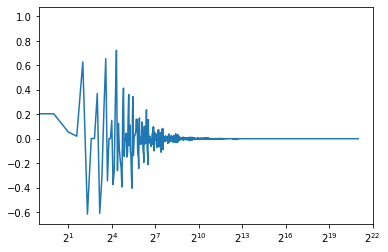

In [232]:
plt.plot(sig_ser)
plt.xscale('log', base = 2)

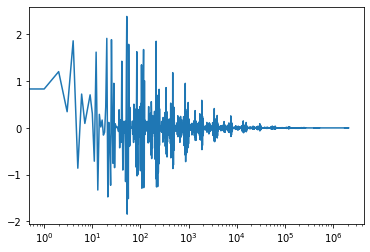

In [53]:
plt.plot(sig_s)
plt.xscale('log')

In [27]:
len(sig_n) # FOR PROCESSES DIV BY 8 IT LOOKS COMPLETELY DIFFERENT...!

2097151

In [59]:
#plt.plot(sig_ser)
plt.axvline(numpy.logspace(0, 25, num = 26, base = 2))
#plt.plot(sig_n)

NameError: name 'numpy' is not defined

In [ ]:
plt.plot(sig_ser)

for i in range (26):
    plt.axvline(2**i)